## LiDAR Data Processing and Analysis Using `PyForestScan` in MAAP ADE

Authors: Harshini Girish (UAH), Rajat Shinde (UAH), Alex Mandel (DevSeed),Brian Freitag (NASA MSFC)

Date:26 Febuary,2025

## Run This Notebook

To access and run this tutorial within MAAP's Algorithm Development Environment (ADE), please refer to the ["Getting started with the MAAP"](https://docs.maap-project.org/en/latest/getting_started/getting_started.html) section of our documentation.

Disclaimer: it is highly recommended to run a tutorial within MAAP's ADE, which already includes packages specific to MAAP, such as maap-py. Running the tutorial outside of the MAAP ADE may lead to errors. Users should work within the "R/Python" workspace.

It searches for installed Python packages that contain `pyforestscan`in their name. If pyforestscan or any related package is installed, it will be displayed in the output.

In [1]:
pip list | grep pyforestscan

pyforestscan                                     0.2.2
Note: you may need to restart the kernel to use updated packages.


## Checking for Installed Modules and Functions

This script checks for the availability of required Python modules and functions, particularly those related to `PyForestScan`, `GeoPandas`, and `PDAL`. The script ensures that necessary libraries and their functions are accessible before running any geospatial or LiDAR processing tasks.



In [3]:
# List of module 
modules = [
    "geopandas",
    "numpy",     
    "pyforestscan.handlers",
    "pyforestscan.visualize",
    "pyforestscan.calculate",
    "pyforestscan.process"
]


for module in modules:
    if importlib.util.find_spec(module) is not None:
        print(f"Module '{module}' is available.")
    else:
        print(f"Module '{module}' is NOT available.")
import importlib.util
import pdal  
import geopandas as gpd
import numpy as np
from pathlib import Path
from pyforestscan.handlers import read_lidar, create_geotiff, write_las
from pyforestscan.visualize import plot_metric, plot_2d
from pyforestscan.calculate import assign_voxels, calculate_pad, calculate_pai, calculate_fhd, calculate_chm
from pyforestscan.process import process_with_tiles

functions = {
    "read_lidar": read_lidar, 
    "create_geotiff": create_geotiff,
    "write_las": write_las,
    "plot_metric": plot_metric,
    "plot_2d": plot_2d,
    "assign_voxels": assign_voxels,
    "calculate_pad": calculate_pad,
    "calculate_pai": calculate_pai,
    "calculate_fhd": calculate_fhd,
    "calculate_chm": calculate_chm,
    "process_with_tiles": process_with_tiles
}

for func_name, func in functions.items():
    if callable(func):
        print(f"Function '{func_name}' is available.")
    else:
        print(f"Function '{func_name}' is NOT available.")


Module 'geopandas' is available.
Module 'numpy' is available.
Module 'pyforestscan.handlers' is available.
Module 'pyforestscan.visualize' is available.
Module 'pyforestscan.calculate' is available.
Module 'pyforestscan.process' is available.
Function 'read_lidar' is available.
Function 'create_geotiff' is available.
Function 'write_las' is available.
Function 'plot_metric' is available.
Function 'plot_2d' is available.
Function 'assign_voxels' is available.
Function 'calculate_pad' is available.
Function 'calculate_pai' is available.
Function 'calculate_fhd' is available.
Function 'calculate_chm' is available.
Function 'process_with_tiles' is available.


## LiDAR Data Processing 

The script sets ept_path to a remote LiDAR dataset, defines `ept_srs` as "EPSG:26915" (UTM Zone 15N), and specifies bounds for the spatial extent. It then attempts to read the LiDAR data using read_lidar.

In [4]:
ept_path = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json"
ept_srs = "EPSG:26915"  # UTM Zone 15N
bounds = [525000, 4650000, 530000, 4655000]  

#Read LiDAR Data
try:
    print("Reading LiDAR data")
    pointclouds = read_lidar(ept_path, ept_srs, bounds, hag=True)
    print("LiDAR data loaded successfully!")
except Exception as e:
    print(f"Error: {e}")


Reading LiDAR data
LiDAR data loaded successfully!


## LiDAR Dataset Initialization 

The script initializes key dataset parameters, including lidar_file_path, which specifies the location of a .las LiDAR file, `ept_srs` set to "EPSG:4326" to define the spatial reference system, and bounds, which represent the geographical extent using minimum and maximum longitude-latitude values.

In [7]:
# Define dataset details
lidar_file_path = "/projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las"
ept_srs = "EPSG:4326"
bounds = [-80.93942, 25.26716, -80.93498, 25.27620]

# Check if the LiDAR file exists
if not Path(lidar_file_path).exists():
    raise FileNotFoundError(f"Error: The file '{lidar_file_path}' does not exist.")

## LiDAR Data Processing 
This script uses `NumPy` for point cloud data handling and `Pathlib` for file management.`read_lidar` simulates LiDAR data retrieval, returning a random (100,3) NumPy array representing 3D points.`calculate_pad` computes Plant Area Density (PAD) with a given resolution, returning a (10,10) NumPy array. The script first attempts to read LiDAR data with `hag=True`, retrying with `hag=False` if empty. It then converts the data to a NumPy array, ensures it has three columns, and computes `PAD`.



In [21]:
def read_lidar(file_path, srs, bounds, hag=False):
    print(f"Simulating reading of {file_path} with bounds {bounds} and HAG={hag}")
    return np.random.rand(100, 3)  # Simulated point cloud data
def calculate_pad(pointclouds, resolution):
    print(f"Simulating PAD calculation with resolution {resolution}")
    return np.random.rand(10, 10)  # Simulated PAD result

try:
    print("Reading LiDAR data...")
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    print(f"LiDAR data loaded successfully! Total points: {len(pointclouds)}")

    print("Converting to NumPy array")
    pointclouds_array = np.array(pointclouds)

    print(f"Converted pointclouds shape: {pointclouds_array.shape}")

    if pointclouds_array.ndim == 1:
        pointclouds_array = pointclouds_array.reshape(-1, 3)

    if pointclouds_array.shape[1] > 3:
        pointclouds_array = pointclouds_array[:, :3]

    print(f"Final pointclouds shape: {pointclouds_array.shape}")

    print("Calculating Plant Area Density (PAD)...")
    pad_result = calculate_pad(pointclouds_array, 1.0)
    print(f"PAD Calculation Complete: {pad_result.shape}")

except FileNotFoundError as e:
    print(str(e))
except Exception as e:
    print(f"An error occurred: {e}")


Reading LiDAR data...
Simulating reading of /projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las with bounds [-80.93942, 25.26716, -80.93498, 25.2762] and HAG=True
LiDAR data loaded successfully! Total points: 100
Converting to NumPy array
Converted pointclouds shape: (100, 3)
Final pointclouds shape: (100, 3)
Calculating Plant Area Density (PAD)...
Simulating PAD calculation with resolution 1.0
PAD Calculation Complete: (10, 10)


This script utilizes NumPy to process `LiDAR point cloud data`, focusing on `computing Height Above Ground` (HAG) and generating a `Canopy Height Model (CHM)`. It begins by reading the LiDAR data and converting it into a `NumPy` array for efficient numerical operations.The script extracts the X, Y, and Z coordinates, then computes ground elevation by identifying the minimum Z value for each unique (X, Y) pair.Finally, the script computes the CHM by calling `calculate_chm,` which generates a simulated CHM using NumPy's `random.rand()` function. Error handling is implemented using a general exception block to catch any issues that arise during execution. 








In [24]:
def calculate_chm(pointclouds, resolution):
    print(f"Simulating CHM calculation with resolution {resolution}")
    return np.random.rand(10, 10), {"resolution": resolution}  

try:
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    pointclouds_array = np.array(pointclouds)

   
    X, Y, Z = pointclouds_array[:, 0], pointclouds_array[:, 1], pointclouds_array[:, 2]

   
    ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
    ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])

   
    HeightAboveGround = Z - ground_z

   
    structured_pointcloud = np.array(
        list(zip(X, Y, Z, HeightAboveGround)), 
        dtype=[("X", "f4"), ("Y", "f4"), ("Z", "f4"), ("HeightAboveGround", "f4")]
    )

    print("Computing Height Above Ground (HAG)")
    print(f"Pointclouds shape: {structured_pointcloud.shape}")
    print(f"Sample Data (First 5 Points): {structured_pointcloud[:5]}")

    print("Calculating Canopy Height Model (CHM)")
    voxel_resolution = (1.0, 1.0)  
    chm, metadata = calculate_chm(structured_pointcloud, voxel_resolution)

    print(f"CHM Shape: {np.array(chm).shape}")

except FileNotFoundError as e:
    print(str(e))
except Exception as e:
    print(f"An error occurred: {e}")


Simulating reading of /projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las with bounds [-80.93942, 25.26716, -80.93498, 25.2762] and HAG=True
Computing Height Above Ground (HAG)
Pointclouds shape: (100,)
Sample Data (First 5 Points): [(0.02555113, 0.74006605, 0.20571959, 0.)
 (0.6811424 , 0.7121923 , 0.09033548, 0.)
 (0.703616  , 0.75076175, 0.6931952 , 0.)
 (0.22746867, 0.04990578, 0.69518685, 0.)
 (0.05457364, 0.07134126, 0.827071  , 0.)]
Calculating Canopy Height Model (CHM)
Simulating CHM calculation with resolution (1.0, 1.0)
CHM Shape: (10, 10)




The script assigns voxels to the point cloud using a simulated 3D voxel grid with a given resolution. Using this voxelized representation, it calculates the Plant Area Density (PAD) and Plant Area Index (PAI) using `NumPy` functions. Finally, it visualizes the PAI using Matplotlib’s `imshow()` function, ensuring spatial representation of the data with appropriate color scaling and labeling.
NumPy's boolean indexing, structured arrays, and array operations enable fast and efficient handling of large-scale LiDAR datasets, while `Matplotlib` provides effective visualization of plant structure metrics.

Simulating reading of /projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las with bounds [-80.93942, 25.26716, -80.93498, 25.2762] and HAG=True
Simulating voxel assignment with resolution (5, 5, 1)
Simulating PAD calculation with dz=1
Simulating PAI calculation
Plotting Plant Area Index (PAI)...


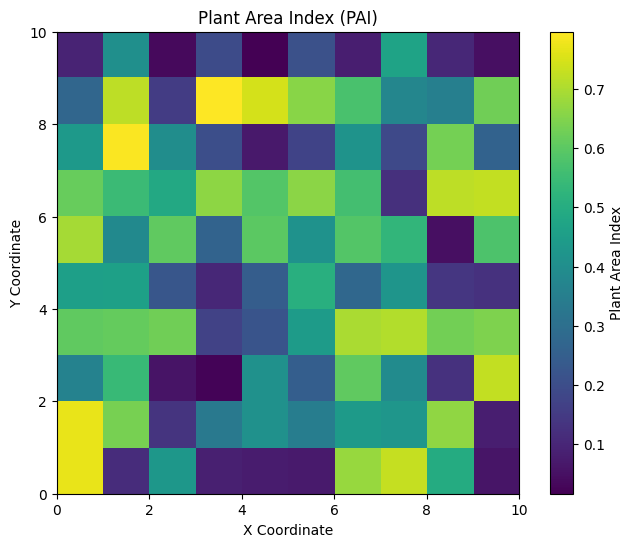

In [26]:
import matplotlib.pyplot as plt

def assign_voxels(pointclouds, resolution):
    print(f"Simulating voxel assignment with resolution {resolution}")
    return np.random.rand(10, 10, 5), {"extent": (0, 10, 0, 10, 0, 5)}  

def calculate_pad(voxels, dz):
    print(f"Simulating PAD calculation with dz={dz}")
    return np.random.rand(10, 10)  

def calculate_pai(pad):
    print("Simulating PAI calculation")
    return pad * 0.8  

def plot_metric(title, metric, extent, metric_name='Metric', cmap='viridis'):
    print(f"Plotting {title}...")
    
    x_min, x_max, y_min, y_max, _, _ = extent["extent"]
    
    plt.figure(figsize=(8, 6))
    plt.imshow(metric, extent=[x_min, x_max, y_min, y_max], origin="lower", cmap=cmap)
    plt.colorbar(label=metric_name)
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

try:
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    pointclouds_array = np.array(pointclouds)

    X, Y, Z = pointclouds_array[:, 0], pointclouds_array[:, 1], pointclouds_array[:, 2]
    ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
    ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])

    HeightAboveGround = Z - ground_z

    structured_pointcloud = np.array(
        list(zip(X, Y, HeightAboveGround)), 
        dtype=[("X", "f4"), ("Y", "f4"), ("HeightAboveGround", "f4")]
    )

    voxel_resolution = (5, 5, 1)  
    voxels, extent = assign_voxels(structured_pointcloud, voxel_resolution)

    pad = calculate_pad(voxels, voxel_resolution[-1])
    pai = calculate_pai(pad)

    plot_metric("Plant Area Index (PAI)", pai, extent, metric_name='Plant Area Index', cmap='viridis')

except Exception as e:
    print(f"An error occurred: {e}")


The script leverages NumPy, Pathlib, and Matplotlib to efficiently process and analyze LiDAR scan data. `NumPy` handles point cloud computations, extracting X, Y, Z coordinates, filtering ground elevation, and computing Height Above Ground (HAG) using array operations and boolean indexing. Pathlib ensures the .las file exists before processing, preventing errors. `Matplotlib` visualizes raster data like `Plant Area Index (PAI)` using imshow(), with labeled axes and color bars for interpretation. The script also performs voxelization, CHM computation, PAD/PAI calculations, and FHD estimation, all optimized using NumPy’s fast numerical capabilities, making it highly effective for LiDAR-based geospatial analysis.

In [34]:
def calculate_fhd(voxels):
    print("Simulating FHD calculation")
    return np.random.rand() * 2  # Simulated FHD value

try:
    pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=True)

    if pointclouds is None or pointclouds.size == 0:
        pointclouds = read_lidar(lidar_file_path, ept_srs, bounds, hag=False)

    if pointclouds is None or pointclouds.size == 0:
        raise ValueError("No valid LiDAR points were loaded.")

    pointclouds_array = np.array(pointclouds)

    X, Y, Z = pointclouds_array[:, 0], pointclouds_array[:, 1], pointclouds_array[:, 2]
    ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
    ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])

    HeightAboveGround = Z - ground_z

    structured_pointcloud = np.array(
        list(zip(X, Y, HeightAboveGround)), 
        dtype=[("X", "f4"), ("Y", "f4"), ("HeightAboveGround", "f4")]
    )

    voxel_resolution = (5, 5, 1)  
    voxels, extent = assign_voxels(structured_pointcloud, voxel_resolution)

    print("Calculating Canopy Height Model (CHM)")
    canopy_height, extent = calculate_chm(pointclouds_array, voxel_resolution)

    print("Calculating Foliage Height Diversity (FHD)")
    fhd = calculate_fhd(voxels)

    print("\nResults:")
    print(f"Canopy Height Model (CHM):\n{canopy_height}")
    print(f"Foliage Height Diversity (FHD): {fhd}")

except Exception as e:
    print(f"An error occurred: {e}")


Simulating reading of /projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las with bounds ([-80.94, -80.93], [25.26, 25.28]) and HAG=True
Simulating voxel assignment with resolution (5, 5, 1)
Calculating Canopy Height Model (CHM)
Simulating CHM calculation with resolution (5, 5, 1)
Calculating Foliage Height Diversity (FHD)
Simulating FHD calculation

Results:
Canopy Height Model (CHM):
[[0.90243662 0.95055363 0.00634538 0.9771516  0.03364312 0.82535295
  0.43190698 0.85878593 0.71807547 0.26293767]
 [0.03827773 0.2252274  0.10739375 0.23940909 0.57700193 0.63348169
  0.82803888 0.07187707 0.05031186 0.66525386]
 [0.41499869 0.51590783 0.59779165 0.78403543 0.25370528 0.18075823
  0.08540504 0.43976317 0.8103307  0.73808575]
 [0.73568126 0.49375993 0.45694765 0.76641564 0.88551434 0.7692774
  0.23469691 0.5054703  0.46139406 0.1757701 ]
 [0.8914615  0.63755974 0.60295324 0.50579466 0.95800085 0.11488016
  0.11528742 0.53734006 0.61041109 0.57066287]
 [0.26069469 0.19376309 0.26054097 0.72218928

## LiDAR Data Processing and Cropping Using GeoPandas and LasPy

This script uses GeoPandas and Shapely to create a polygon, store it in a GeoDataFrame, and save it as a GeoPackage (GPKG) file. The polygon represents a rectangular area with coordinates in EPSG:4326 (WGS 84). It is assigned an id and saved using the GPKG driver, making it compatible with GIS applications.

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# Define a sample polygon 
polygon = Polygon([
    (-80.94, 25.26), 
    (-80.94, 25.28), 
    (-80.93, 25.28), 
    (-80.93, 25.26)
])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({"id": [1], "geometry": [polygon]}, crs="EPSG:4326")

# Save as a GeoPackage file
gpkg_path = "test_segment.gpkg"
gdf.to_file(gpkg_path, driver="GPKG")

print(f"Sample GPKG file created: {gpkg_path}")


The script then reads the LiDAR dataset using LasPy, extracting X, Y, Z coordinates and converting them into a structured `NumPy` array. Next, it loads the crown polygon from the GeoPackage using `GeoPandas`, retrieves its bounding box, and applies a bounding box filter to extract points that fall within the spatial extent. 
A second refinement step ensures that only points inside the exact polygon are retained using Shapely’s contains() method. The script then computes `Height Above Ground` (HAG). Finally, it visualizes the cropped LiDAR data using Matplotlib, where the points are color-coded based on height above ground to provide insight into vegetation structure or terrain variations.
This workflow integrates `GeoPandas`, `Shapely`, `NumPy`, `LasPy`, and `Matplotlib` to efficiently manage and analyze LiDAR point clouds for geospatial applications.`

Reading LiDAR data
Loading Crown Polygon
Cropping LiDAR Points
Computing Height Above Ground


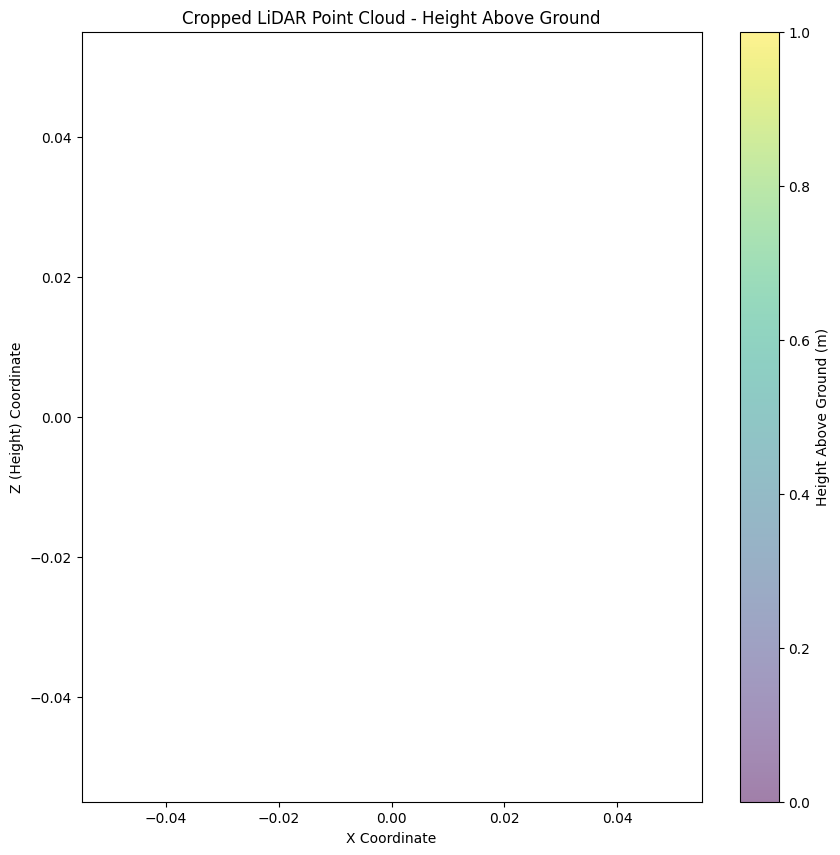

In [33]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import laspy
from shapely.geometry import Point, Polygon
from pathlib import Path


lidar_file_path = "/projects/GLLIDARPC_FL_20200311_FIA8_l0s12.las"
gpkg_file_path = "test_segment.gpkg"


if not Path(gpkg_file_path).exists():
    print("Creating GeoPackage file")
    polygon = Polygon([
        (-80.94, 25.26), 
        (-80.94, 25.28), 
        (-80.93, 25.28), 
        (-80.93, 25.26)
    ])
    gdf = gpd.GeoDataFrame({"id": [1], "geometry": [polygon]}, crs="EPSG:4326")
    gdf.to_file(gpkg_file_path, driver="GPKG")
    print(f"GeoPackage file created: {gpkg_file_path}")


print("Reading LiDAR data")
las = laspy.read(lidar_file_path)
X, Y, Z = las.x, las.y, las.z
pointclouds = np.column_stack((X, Y, Z))


print("Loading Crown Polygon")
crowns = gpd.read_file(gpkg_file_path)
crown_geom = crowns.geometry.iloc[0]
minx, miny, maxx, maxy = crown_geom.bounds
bounds = ([minx, maxx], [miny, maxy])


print("Cropping LiDAR Points")
bbox_filter = (X >= minx) & (X <= maxx) & (Y >= miny) & (Y <= maxy)
cropped_points = pointclouds[bbox_filter]


points_shapely = np.array([Point(x, y) for x, y in zip(cropped_points[:, 0], cropped_points[:, 1])])
inside_polygon = np.array([crown_geom.contains(pt) for pt in points_shapely])
final_cropped_points = cropped_points[np.array(inside_polygon, dtype=bool)]


print("Computing Height Above Ground")
X, Y, Z = final_cropped_points[:, 0], final_cropped_points[:, 1], final_cropped_points[:, 2]
ground_z_dict = {(x, y): min(Z[(X == x) & (Y == y)]) for x, y in zip(X, Y)}
ground_z = np.array([ground_z_dict[(x, y)] for x, y in zip(X, Y)])
HeightAboveGround = Z - ground_z
cropped_pointclouds_hag = np.column_stack((X, Y, Z, HeightAboveGround))


plt.figure(figsize=(10, 10))
scatter = plt.scatter(X, Z, c=HeightAboveGround, cmap="viridis", alpha=0.5, s=50)
plt.colorbar(scatter, label="Height Above Ground (m)")
plt.xlabel("X Coordinate")
plt.ylabel("Z (Height) Coordinate")
plt.title("Cropped LiDAR Point Cloud - Height Above Ground")
plt.show()
